Training Accuracy: 0.9047619047619048
Testing Accuracy: 0.9111111111111111

Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.77      0.83        13
           2       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



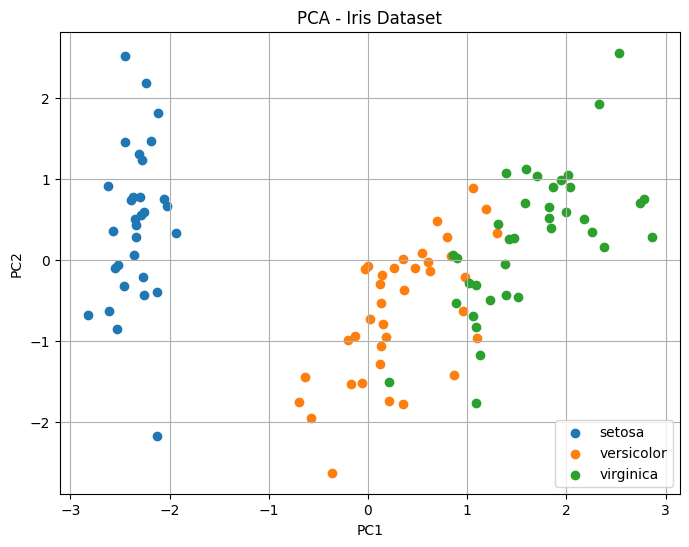

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf = LogisticRegression()
clf.fit(X_train_pca, y_train)

y_train_pred = clf.predict(X_train_pca)
y_test_pred = clf.predict(X_test_pca)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=iris.target_names[label])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()
